<a href="https://colab.research.google.com/github/AlexandreSauze/Tecnologico-de-Monterrey-Python-Projects/blob/main/Schnider.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Libraries
import numpy as np
from scipy.special import jn
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.animation import FuncAnimation, FFMpegWriter

#Define 2D space
N = 2**6 #Define number of points
x = np.linspace(-0.01,0.01,N) #Define x-axis
y = np.linspace(-0.01,0.01,N) #Define y-axis
X,Y = np.meshgrid(x,y) #Create 2D space

#Define Physical Constants
R = 0.0085 #Define radius of cable [m]

#Define properties of copper cable
eps = 1 #Define permittivity of medium
mu = 1 #Define permeability of medium
sig = 1 #Define conductivity of medium
Imax = 350 #Define current
w = 60 #[Hz] Define frequency of current

kap = np.sqrt(1j*w*mu*sig) #Define kappa
skin_dep= np.sqrt(2/(mu*sig*w))

#Define Variables
t1 = np.linspace(0,100,1000) #Define time

In [2]:
def Bessel0(r):
    return np.sqrt(1/(2*np.pi*kap*r))*np.cos(kap*r-np.pi/4)

def Bessel1(r):
    #Return the derivative of Bessel0 with the same size as r
    return np.sqrt(1/(2*np.pi*kap*r))*np.sin(kap*r-np.pi/4)+np.sqrt(1/(2*np.pi*kap*r))/2/np.sqrt(kap*r)*np.cos(kap*r-np.pi/4)

def E_in(r,t):
    return -1j*w*Bessel0(kap*r)*np.exp(-1j*w*t)

def B_in(r,t):
    return Bessel1(kap*r)*np.exp(-1j*w*t)

def B_out(r,t):
    return (mu*Imax**np.exp(-1j*w*t))/(2*np.pi*r)

def J(r,t):
    return Imax*np.exp(-1j*w*t)

In [3]:
r = np.sqrt(X*2 + Y*2)#Position radius
r_in = r * (r<R)        #Only inside values
r_out= r * (r>R)        #Only outside values
thet = np.arctan(Y/X)   #Define azimuthal angle
t_eval = 1.1 #Time to evaluate

#Divide electric fields in X and Y components
Ez = E_in(r_in,t_eval).real
#Bx = (B_in(r_in,t_eval).real/B_in(r_in,t_eval).real)* np.sin(thet) #Normalized magnitudes
#By =-(B_in(r_in,t_eval).real/B_in(r_in,t_eval).real)* np.cos(thet) #Normalized magnitude
Bx = (B_in(r_in,t_eval).real)* np.sin(thet) #Normalized magnitudes
By =-(B_in(r_in,t_eval).real)* np.cos(thet) #Normalized magnitude

<ipython-input-3-e463f26d9151>:1: RuntimeWarning: invalid value encountered in sqrt
  r = np.sqrt(X*2 + Y*2)#Position radius
<ipython-input-2-a50709252808>:2: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(1/(2*np.pi*kap*r))*np.cos(kap*r-np.pi/4)
<ipython-input-2-a50709252808>:2: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(1/(2*np.pi*kap*r))*np.cos(kap*r-np.pi/4)
<ipython-input-2-a50709252808>:2: RuntimeWarning: invalid value encountered in multiply
  return np.sqrt(1/(2*np.pi*kap*r))*np.cos(kap*r-np.pi/4)
<ipython-input-2-a50709252808>:6: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(1/(2*np.pi*kap*r))*np.sin(kap*r-np.pi/4)+np.sqrt(1/(2*np.pi*kap*r))/2/np.sqrt(kap*r)*np.cos(kap*r-np.pi/4)
<ipython-input-2-a50709252808>:6: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(1/(2*np.pi*kap*r))*np.sin(kap*r-np.pi/4)+np.sqrt(1/(2*np.pi*kap*r))/2/np.sqrt(kap*r)*np.cos(kap*r-np.pi/4)
<ipython-input-2-a5

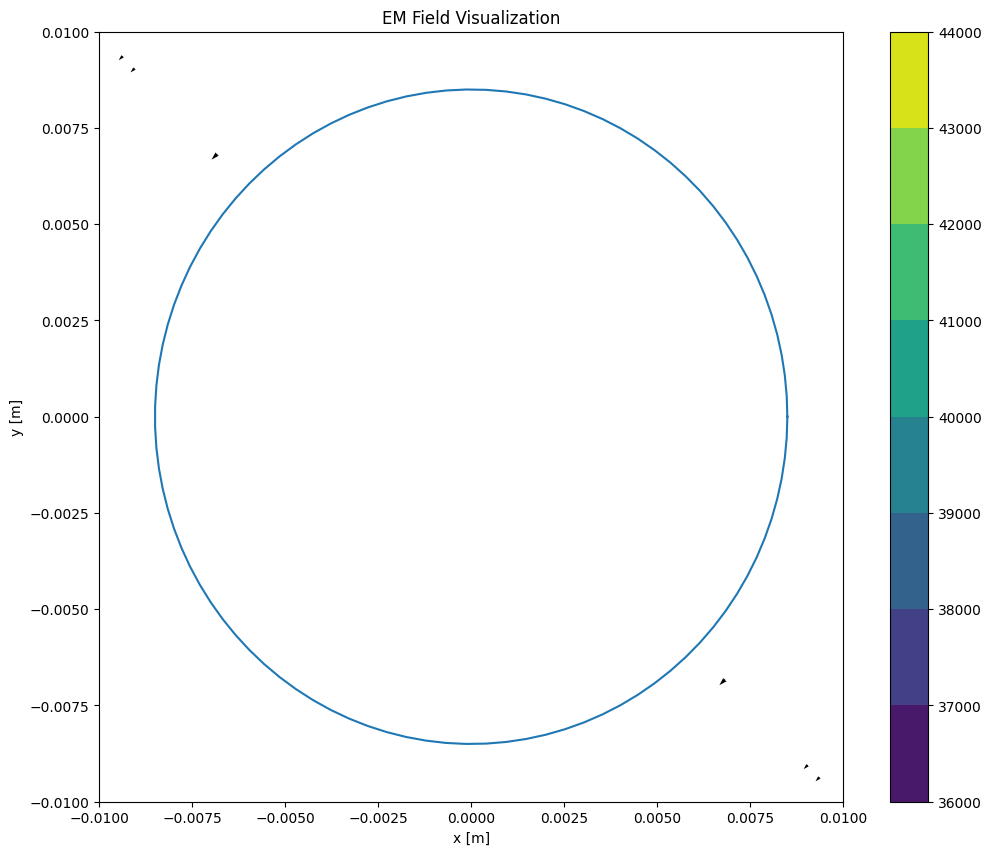

<ipython-input-2-a50709252808>:2: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(1/(2*np.pi*kap*r))*np.cos(kap*r-np.pi/4)
<ipython-input-2-a50709252808>:2: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(1/(2*np.pi*kap*r))*np.cos(kap*r-np.pi/4)
<ipython-input-2-a50709252808>:2: RuntimeWarning: invalid value encountered in multiply
  return np.sqrt(1/(2*np.pi*kap*r))*np.cos(kap*r-np.pi/4)
<ipython-input-2-a50709252808>:6: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(1/(2*np.pi*kap*r))*np.sin(kap*r-np.pi/4)+np.sqrt(1/(2*np.pi*kap*r))/2/np.sqrt(kap*r)*np.cos(kap*r-np.pi/4)
<ipython-input-2-a50709252808>:6: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(1/(2*np.pi*kap*r))*np.sin(kap*r-np.pi/4)+np.sqrt(1/(2*np.pi*kap*r))/2/np.sqrt(kap*r)*np.cos(kap*r-np.pi/4)
<ipython-input-2-a50709252808>:6: RuntimeWarning: invalid value encountered in multiply
  return np.sqrt(1/(2*np.pi*kap*r))*np.sin(kap*r-np.pi/4

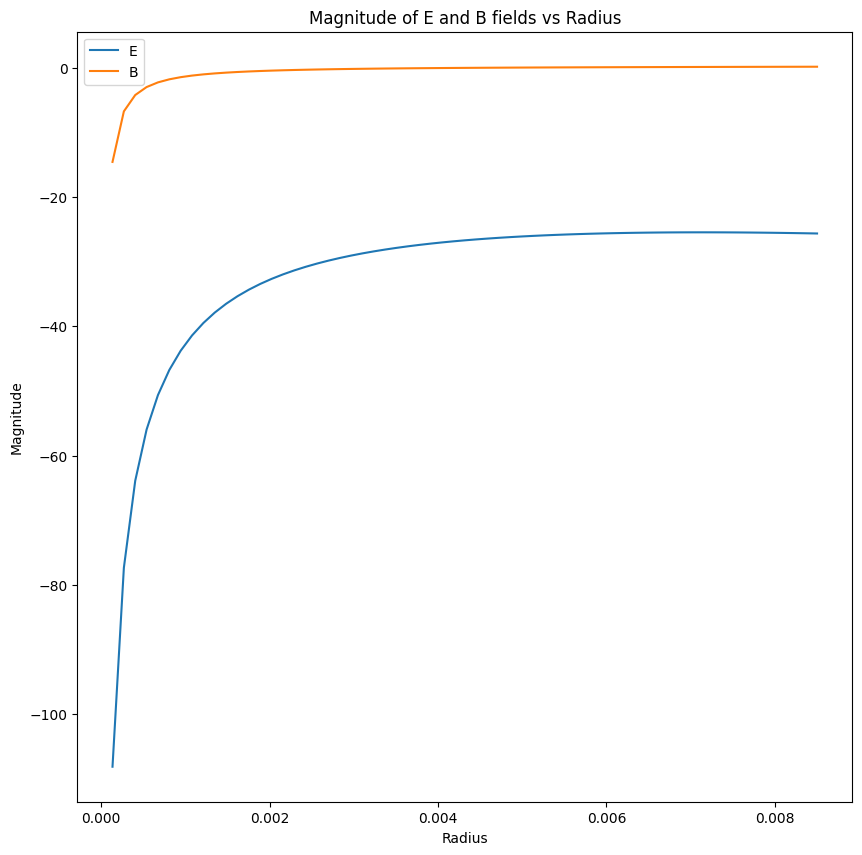

In [4]:
#Plot Fields
fig = plt.figure(figsize=(12,10))
plt.contourf(X,Y,Ez)    #colormap E field
plt.colorbar()
plt.quiver(X,Y,Bx,By)   #quiver plot of B field inside cable
plt.plot(R*np.cos(np.linspace(0,2*np.pi,100)),R*np.sin(np.linspace(0,2*np.pi,100))) #Plot a circle on XY mesh
#show axis and title of plot
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('EM Field Visualization')
plt.show()

#Plot magnitude of E field vs radius
fig = plt.figure(figsize=(10,10))
plt.plot(np.linspace(0,R,N),E_in(np.linspace(0,R,N),1.6).real,) #Plot E field vs radius
plt.plot(np.linspace(0,R,N),B_in(np.linspace(0,R,N),1.6).real,) #Plot B field vs radius
#show axis and title of plot
plt.xlabel('Radius')
plt.ylabel('Magnitude')
plt.title('Magnitude of E and B fields vs Radius')
plt.legend(['E','B'])
plt.show()